## Training UNet With CelebA Dataset
### By 1 epochs, 3200steps.

In [1]:
import os
import sys
import datetime

import PIL.Image as Image
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_DIR = os.path.join(os.getcwd(), '..')
sys.path.append(ROOT_DIR)

In [2]:
from keras_segmentation.models.unet import unet

Using TensorFlow backend.
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jho/anaconda3/envs/tf10-py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jho/anaconda3/

In [10]:
tag = 'celeba/unet/ep1/st367'

now = datetime.datetime.now()
NOW = "{:%Y%m%dT%H%M}".format(now)

OUT_DIR = os.path.join(ROOT_DIR, 'out')
CHECKPOINTS_DIR = os.path.join(OUT_DIR, 'checkpoints')
PREDICTIONS_DIR = os.path.join(OUT_DIR, 'predictions')
LOGS_DIR = os.path.join(OUT_DIR, 'logs')

DATASET_DIR = os.path.join(ROOT_DIR, 'dataset/celeba')

TRAIN_IMAGES = os.path.join(DATASET_DIR, 'train/original')
TRAIN_ANNOTATIONS = os.path.join(DATASET_DIR, 'train/mask')
VAL_IMAGES = os.path.join(DATASET_DIR, 'val/original')
VAL_ANNOTATIONS = os.path.join(DATASET_DIR, 'val/mask')

CHECKPOINTS_DIR = os.path.join(CHECKPOINTS_DIR, tag)
PREDICTIONS_DIR = os.path.join(PREDICTIONS_DIR, tag)
LOGS_DIR = os.path.join(LOGS_DIR, tag)
if not os.path.exists(CHECKPOINTS_DIR):
    os.makedirs(CHECKPOINTS_DIR)
if not os.path.exists(PREDICTIONS_DIR):
    os.makedirs(PREDICTIONS_DIR)
if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    
dir_configuration = """
NOW = {now}
out_dir : {out_dir}
checkpoints_dir : {checkpoints_dir}
logs_dir : {logs_dir}
predictions_dir : {predictions_dir}

dataset_dir : {dataset_dir}
train_images : {train_images}
train_annotations : {train_annotations}
val_images : {val_images}
val_annotations : {val_annotations}
""".format(
    now=NOW,
    out_dir=OUT_DIR,
    checkpoints_dir=CHECKPOINTS_DIR,
    logs_dir=LOGS_DIR,
    predictions_dir=PREDICTIONS_DIR,

    dataset_dir=DATASET_DIR,
    train_images=TRAIN_IMAGES,
    train_annotations=TRAIN_ANNOTATIONS,
    val_images=VAL_IMAGES,
    val_annotations=VAL_ANNOTATIONS,
)
print(dir_configuration)


NOW = 20200417T2321
out_dir : /home/jho/projects/image-segmentation-keras/train_faces/../out
checkpoints_dir : /home/jho/projects/image-segmentation-keras/train_faces/../out/checkpoints/celeba/unet/ep1/st367
logs_dir : /home/jho/projects/image-segmentation-keras/train_faces/../out/logs/celeba/unet/ep1/st367
predictions_dir : /home/jho/projects/image-segmentation-keras/train_faces/../out/predictions/celeba/unet/ep1/st367

dataset_dir : /home/jho/projects/image-segmentation-keras/train_faces/../dataset/celeba
train_images : /home/jho/projects/image-segmentation-keras/train_faces/../dataset/celeba/train/original
train_annotations : /home/jho/projects/image-segmentation-keras/train_faces/../dataset/celeba/train/mask
val_images : /home/jho/projects/image-segmentation-keras/train_faces/../dataset/celeba/val/original
val_annotations : /home/jho/projects/image-segmentation-keras/train_faces/../dataset/celeba/val/mask



In [19]:
# Configurations
N_CLASSES = 2 + 1
# I_HEIGHT = 416
I_HEIGHT = 218
# I_WIDTH = 608
I_WIDTH = 178

STEPS_PER_EPOCH = 3200

EPOCHS = 1

In [20]:
# Define model
model = unet(n_classes=N_CLASSES, input_height=I_HEIGHT, input_width=I_WIDTH)

ValueError: `Concatenate` layer requires inputs with matching shapes except for the concat axis. Got inputs shapes: [(None, 26, 22, 512), (None, 27, 22, 256)]

In [13]:
# Train
checkpoints_path = os.path.join(CHECKPOINTS_DIR, NOW)
logs_path = os.path.join(LOGS_DIR, NOW)

model.train(
    train_images = TRAIN_IMAGES,
    train_annotations = TRAIN_ANNOTATIONS,
    checkpoints_path=checkpoints_path,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    log_dir=logs_path,
    validate=True,
    val_images=VAL_IMAGES,
    val_annotations = VAL_ANNOTATIONS,
)

Verifying training dataset
Found error during data loading
No corresponding segmentation found for image /home/jho/projects/image-segmentation-keras/train_faces/../dataset/celeba/train/original/009783.jpg.


AssertionError: 

In [14]:
sample_test_image = os.path.join(VAL_IMAGES, '126913.jpg')
sample_test_annotaion = os.path.join(VAL_ANNOTATIONS, '126913.bmp')
out_fname = os.path.join(PREDICTIONS_DIR, 'out_126913_{}.png'.format(NOW))

In [15]:
# Out
out = model.predict_segmentation(
    inp=sample_test_image,
    out_fname=out_fname
)

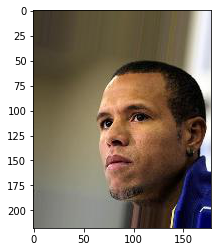

In [16]:
plt.imshow(Image.open(sample_test_image))

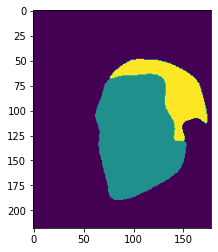

In [17]:
plt.imshow(Image.open(sample_test_annotaion))

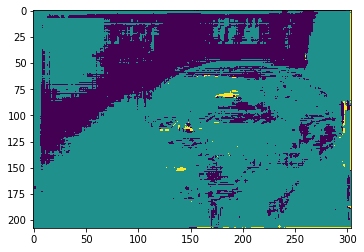

In [18]:
plt.imshow(out)

In [ ]:
# evaluating the model
evaluation = model.evaluate_segmentation(inp_images_dir=TEST_IMAGES, annotations_dir=TEST_ANNOTATIONS)
print(evaluation)
